<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT (EDA)
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [11]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-10d0a39d


In [12]:
!cat /root/.ssh/id_rsa.pub

cat: /root/.ssh/id_rsa.pub: No such file or directory


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [13]:
!ssh -T git@github.com

git@github.com: Permission denied (publickey).


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [14]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [15]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [1]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_trf

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 12.8MB 235kB/s 
     |████████████████████████████████| 9.1MB 33.2MB/s 
     |████████████████████████████████| 1.1MB 38.4MB/s 
     |████████████████████████████████| 460kB 36.4MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 122kB 39.1MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=d21847866a5dfecc2e69bc1d627a2e888eb8289a0f0eb5d136cfb308e88dfc06
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

     |████████████████████████████████| 165.3 MB 38 kB/s 
     |████████████████████████████████| 93.4 MB 17 kB/s 
     |████████████████████████████████| 998 kB 45.5 MB/s 
     |████████████████████████████████| 2.1 MB 45.8 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 3.3 MB 43.8 MB/s 
2021-05-05 06:48:19.568824: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 459.7 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
************************
        Versions        
************************
Tensorflow version=2.4.1
Keras version=2.4.0
Sklearn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Seaborn version=0.11.1
Matplotlib version=3.2.2
SpaCy version=3.0.6
Python version=3.7.10


### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [33]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [4]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./Cleaned Dataset1.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,3335955665151329792,CUBIC DECO PTE. LTD.,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,https://www.cubicdeco.com/,Cubic Deco Pte Ltd is an interior contractor b...,NaN
1,4869155818043957248,UTRACON CORPORATION PTE. LTD.,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://utracon.com/ucplwp/index.php/about-us/,The Company provides civil engineering service...,NaN
2,9105432065968196608,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,NaN,cni,building material,building material_manufacturer,midstream,https://www.overlandceramics.com/,Overland Ceramics is a ceramic tile manufactur...,NaN
3,1443389736722230016,BYMA PTE LTD,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://recordowl.com/company/byma-pte-ltd,BYMA is a joint-venture between Bouygues Batim...,NaN
4,8604660251488355328,TTCL MALAYSIA SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://www.ttcl.com/about/subsidiary_and_affi...,TTCL has experiences and expertises in providi...,NaN
5,4532858488890287104,LYRA INFORMATION PTE. LTD.,SINGAPORE,NaN,tmt,it services,it services,midstream,https://recordowl.com/company/lyra-infosystems...,Lyra Infosystems is a Technology Services & IT...,NaN
6,1265923277439065088,XINYUAN CONSTRUCTION PTE. LTD.,SINGAPORE,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://sgpgrid.com/company-details/xinyuan-co...,We are a rapidly growing development & constru...,NaN
7,8916117183994534912,HARUM MAJUINDAH SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,https://www.ctoscredit.com.my/business/HARUM-M...,"TRADING OF BUILDING MATERIALS, SPECIALISES IN ...",NaN
8,3859622006099505152,SINGAPORE RADIO & INDUSTRY PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://www.timesbusinessdirectory.com/compani...,Importers and exporters of gas cookers and de...,NaN
9,3949003258736629248,MEC JATI CONSORTIUM SDN. BHD.,MALAYSIA,NaN,cni,buildings & industrial,buildings & industrial_contractor,midstream,http://mecjati.com/about-us/,MEC JATI CONSORTIUM SDN. BHD.( 479906-A) is a ...,NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [5]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [6]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 467
Total number of countries: 7
Total number of sectors: 14
Total number of subsectors: 23
Total number of valuechain: 16


In [7]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE    168
MALAYSIA     112
THAILAND     108
CHINA         41
INDONESIA     20
HONG KONG     17
AUSTRALIA      1
Name: Country, dtype: int64

List of unique sector:
cni    173
tmt    156
ong     53
CNI     25
OOS     12
TMT     12
ind      6
cg       5
oos      5
REH      4
IND      3
CG       1
ONG      1
reh      1
Name: Sector, dtype: int64

List of unique valuechain:
midstream                 229
downstream                121
upstream                   30
MIDSTREAM                  24
Midstream                   8
upstream or downstream      8
Downstream                  4
Upstream                    3
manufacturer                3
DOWNSTREAM                  3
across value chain          2
                            2
UPSTREAM                    2
distributor                 1
trader                      1
Across value chain          1
Name: Valuechain, dtype: int64


In [8]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
buildings & industrial               105
building material                     56
consumer electronics                  54
it services                           38
o&g                                   36
semiconductor                         31
telecommunication                     18
others                                17
cni_service providers                 17
petrochemical                         15
digital_business                      15
utilities                             13
media                                 12
infrastructure                         6
metals and mining                      5
retail n distribution                  5
auto & mec                             4
residential                            3
o&g_service providers/contractors      2
commercial                             2
cni_equipment suppliers                1
ioc/noc                                1
agribusiness                           1
Name: Subsector, dtype: int64


In [9]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
buildings & industrial_contractor                              104
consumer electronics_distributor                                51
building material_manufacturer                                  39
it services                                                     38
o&g_retail outlet                                               32
electronics components/semiconductor_component manufacturer     22
building material_supplier_distributor                          17
others                                                          17
cni_service providers                                           17
digital_business                                                15
network operator                                                 9
electronics components/semiconductor_component distributor       9
petrochemical_producer                                           8
media_aggregator/distributor                                     8
utilities_contractor                

### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [10]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,Cubic Deco Pte Ltd is an interior contractor b...
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering service...
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,Overland Ceramics is a ceramic tile manufactur...
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,BYMA is a joint-venture between Bouygues Batim...
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,TTCL has experiences and expertises in providi...
...,...,...,...,...,...,...,...
462,RYOSHO TECHNO SINGAPORE PTE LTD,SINGAPORE,tmt,telecommunication,network equipment supplier,upstream,The Company's line of business includes the wh...
463,"G.D.C.GRAND DIAMOND CO.,LTD.",THAILAND,ong,petrochemical,plastics convertor,downstream,Product description\n\nจำหน่ายผลิตภัณฑ์ที่เกี่...
464,"PENKHUN CO.,LTD.",THAILAND,CG,retail n distribution,hpc,Downstream,"ELVIRA: Sewing Machine, Press Iron, Steam Iron..."
465,TERADYNE (ASIA) PTE. LTD.,SINGAPORE,oos,others,others,NaN,From idea to final product – we test and autom...


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [11]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
384,"GIARTO AUDRI CEMERLANG,PT",INDONESIA,NaN,NaN,NaN,NaN,NaN
392,KSO SUMMARECON VARIATATA SERPONG,INDONESIA,NaN,NaN,NaN,NaN,NaN
419,"HONG KONG JULE TRADING CO., LIMITED",HONG KONG,NaN,NaN,NaN,NaN,NaN
421,PAWEENA TEMVANISH,THAILAND,NaN,NaN,NaN,NaN,NaN
437,LUOTIAN COUNTY SILICON CARBIDE PLANT,CHINA,NaN,NaN,NaN,NaN,NaN
438,"QUANZHOU LU:WAN TRADE CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
439,"ZHONGSHAN TENGFA ELECTRONIC CO., LTD",CHINA,NaN,NaN,NaN,NaN,NaN
440,"MARLBORO TO MOTOR (SHANGHAI) CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
443,"TAIZHOU HENGYUAN ARCHITECTURE MATERIAL CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
447,"YANCHENG HENGXIN AIR-CONDITION XIAOSHOU CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN


In [12]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,Cubic Deco Pte Ltd is an interior contractor b...
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering service...
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,Overland Ceramics is a ceramic tile manufactur...
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,BYMA is a joint-venture between Bouygues Batim...
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,TTCL has experiences and expertises in providi...
...,...,...,...,...,...,...,...
462,RYOSHO TECHNO SINGAPORE PTE LTD,SINGAPORE,tmt,telecommunication,network equipment supplier,upstream,The Company's line of business includes the wh...
463,"G.D.C.GRAND DIAMOND CO.,LTD.",THAILAND,ong,petrochemical,plastics convertor,downstream,Product description\n\nจำหน่ายผลิตภัณฑ์ที่เกี่...
464,"PENKHUN CO.,LTD.",THAILAND,CG,retail n distribution,hpc,Downstream,"ELVIRA: Sewing Machine, Press Iron, Steam Iron..."
465,TERADYNE (ASIA) PTE. LTD.,SINGAPORE,oos,others,others,NaN,From idea to final product – we test and autom...


In [13]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 457


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

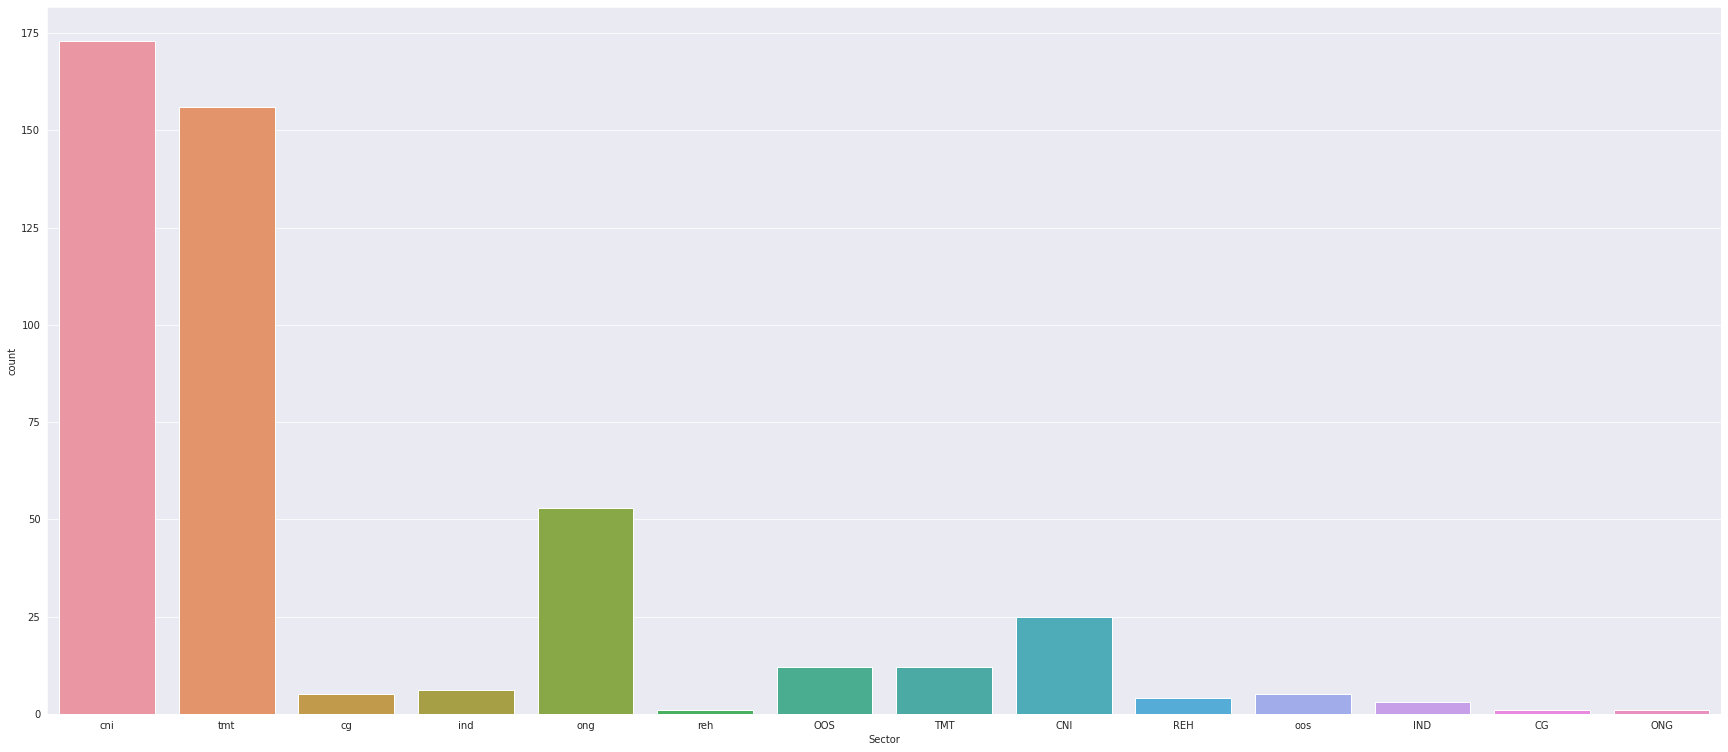

In [14]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

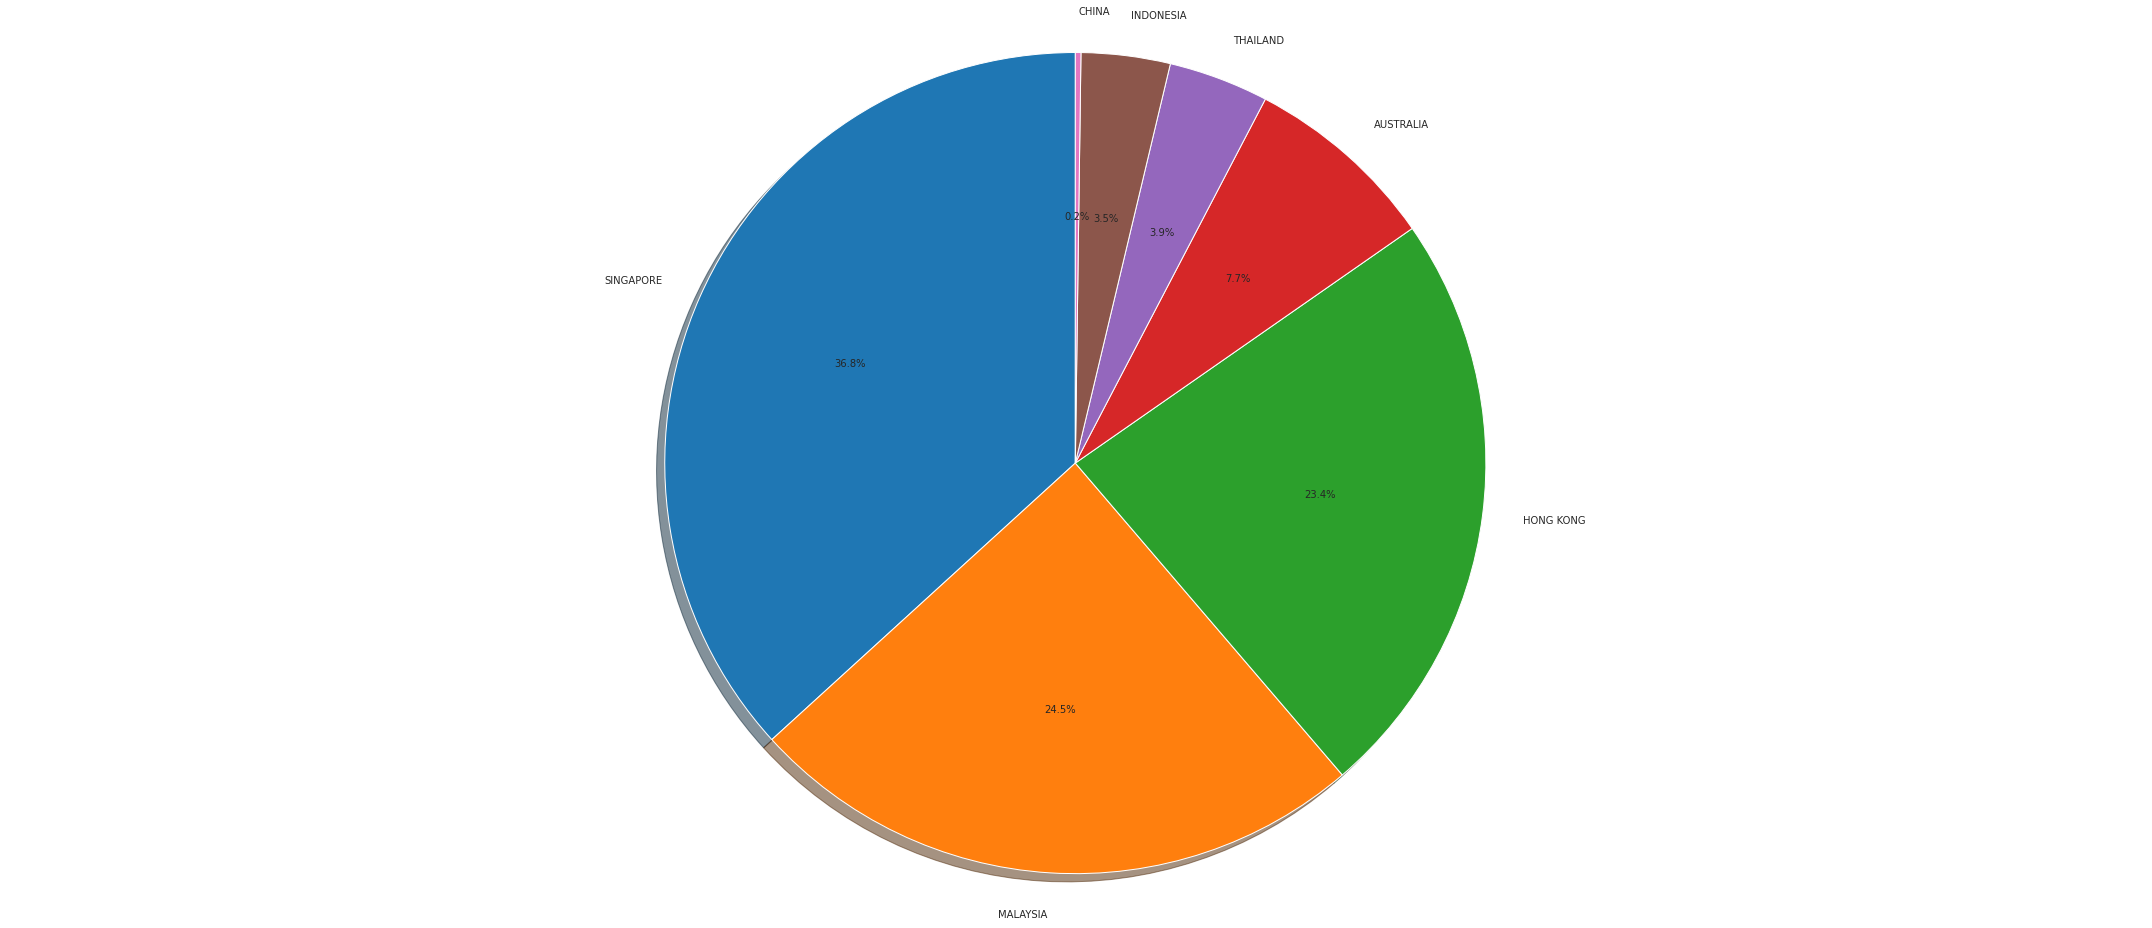

In [15]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [16]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop. 
1                                    

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [17]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop. 
1                                    

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [18]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349.0
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85.0
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187.0
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956.0
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274.0


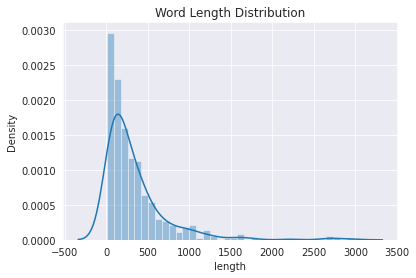

In [19]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [20]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349.0
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85.0
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187.0
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956.0
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274.0
...,...,...,...,...,...,...,...,...
345,"CPACE INTER CO.,LTD.",THAILAND,ong,petrochemical,petrochemical_producer,upstream or downstream,Business Category: Manufacture of pesticides and other chemicals for agriculture,80.0
346,"HANGZHOU XIANGFU FUEL STATION CO.,LTD",CHINA,ong,o&g,o&g_retail outlet,downstream,"Hangzhou Xiangfu Fuel Station Co., Ltd. was founded in 1989. The company's line of business includes selling gasoline and lubricating oils.",139.0
347,"ANQILI ELECTRONIC COMPONENTS (SHENZHEN) CO., LTD ()",CHINA,tmt,semiconductor,electronics components/semiconductor_component manufacturer,upstream,"Anqili Electronics Components (Shenzhen) Co., Ltd. was founded in 1991. The Company's line of business includes the manufacturing of electronic components such as antennas, switches, and waveguides.",198.0
348,"HENAN ZHONGYUAN HEAVY FORGING CO., LTD",CHINA,ind,metals and mining,steel fabricator,manufacturer,"Henan Zhongyuan Heavy Forging Co., Ltd. was founded in 2004. The company's line of business includes the operation of blast furnaces and steel mills.",149.0


### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [21]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,CUBIC DECO PTE. LTD.,SINGAPORE,cni,cni_service providers,cni_service providers,midstream,"Cubic Deco Pte Ltd is an interior contractor based in Singapore. Incorporated in March 2005 and with a current strength of 30, we provide professional services for interior fit out and construction works for residential, offices and retail spaces. We also offer a complete custom-made carpentry and joinery works right here at our inhouse workshop.",349
1,UTRACON CORPORATION PTE. LTD.,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,The Company provides civil engineering services and on-site post-tensioning products.,85
2,"GUANGDONG OVERLAND CERAMICS CO., LTD",SINGAPORE,cni,building material,building material_manufacturer,midstream,"Overland Ceramics is a ceramic tile manufacturer & supplier integrating design, research and development, manufacturing and marketing. Our products are wholesale marble tile & stone tile.",187
3,BYMA PTE LTD,SINGAPORE,cni,buildings & industrial,buildings & industrial_contractor,midstream,"BYMA is a joint-venture between Bouygues Batiment International and SPA Project Management. The company brings together the expertise of a leading international construction group (Bouygues Construction) and the local knowledge of Yoma Strategic Holdings focusing on the Myanmar market. In April 2013, BYMA was awarded by Thanlin Estate Development the design and build contract for the 2nd phase of Star City (Zone B), a prominent residential estate featuring 4,980 apartments, car parks and communal facilities located along the Bago River in the outskirts of Yangon. In December 2014, BYMA was also awarded the 3rd phase of Star City (Zone C). The development will be composed of 6 residential towers, including 956 residential units, as well as a 26,000m2 car park, located around the periphery of the site over two levels, providing 1,147 car park spaces. With more than 1,500 employees, BYMA will soon be the leading construction company in Myanmar.",956
4,TTCL MALAYSIA SDN. BHD.,MALAYSIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"TTCL has experiences and expertises in providing integrated design and engineering, procurement of machinery & equipment, and construction (Integrated EPC) of turnkey projects for industrial and process plants, mainly in energy, petrochemical, chemical and power industries.",274
...,...,...,...,...,...,...,...,...
462,RYOSHO TECHNO SINGAPORE PTE LTD,SINGAPORE,tmt,telecommunication,network equipment supplier,upstream,The Company's line of business includes the wholesale distribution of electronic parts and electronic communications equipment.,128
463,"G.D.C.GRAND DIAMOND CO.,LTD.",THAILAND,ong,petrochemical,plastics convertor,downstream,"Product description จำหน่ายผลิตภัณฑ์ที่เกี่ยวกับเม็ดพลาสติก บรรจุภัณฑ์พลาสติกทุกชนิด และ กาว สารเติมแต่งที่เกี่ยวกับเม็ดพลาสติก และแม่สีทุกชนิด Translation: Selling products related to plastic pellets. All kinds of plastic packaging and adhesives, additives related to plastic resins. And all kinds of primary colors",318
464,"PENKHUN CO.,LTD.",THAILAND,CG,retail n distribution,hpc,Downstream,"ELVIRA: Sewing Machine, Press Iron, Steam Iron, Steam Cleaner, Vacumm Cleaner ELS Laundry Service",98
465,TERADYNE (ASIA) PTE. LTD.,SINGAPORE,oos,others,others,,"From idea to final product – we test and automate it all Teradyne tests and helps build the world’s most innovative products. Our leading-edge testers make sure that new products work right the first time, every time. And our portfolio of industrial automation solutions helps manufacturers to develop and deliver new products quickly, efficiently and cost-effectively.",370


### 4.5. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [22]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [35]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_trf")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)
Doc.set_ectension('word_bag', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []

    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_)

    doc._.processed = temp

    return doc

# custom BoW processor
@Language.component('BoW')
def bag_of_words(doc):
    pass

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_preprocess', last=True)



<function __main__.custom_preprocess>

In [47]:
# test BoW
test_words = ['residential building', 'residential reit','condomnium', 'dwelling', 'residential property', 'apartment', 'housing', 'residence','luxurious home','freehold','showflat','residential']
test_company = processed_doc[3]._.processed

dictionary = dict.fromkeys(test_words, 0)
for word in test_company:
    if word in test_words:
        dictionary[word] += 1

print(list(dictionary.values()))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3]


In [38]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

In [48]:
print(processed_doc[-4]._.processed)

['product', 'description', ' ', 'จำหน่ายผลิตภัณฑ์ที่เกี่ยวกับเม็ดพลาสติก', 'บรรจุภัณฑ์พลาสติกทุกชนิด', 'และ', 'กาว', 'สารเติมแต่งที่เกี่ยวกับเม็ดพลาสติก', 'และแม่สีทุกชนิด', ' ', 'translation', 'selling', 'product', 'relate', 'plastic', 'pellet', 'kind', 'plastic', 'packaging', 'adhesive', 'additive', 'relate', 'plastic', 'resin', 'kind', 'primary', 'color']


In [ ]:
for token in doc[3]:
    print(token.text, token.ent_type_, token.ent_type)

BYMA ORG 383
is  0
a  0
joint-venture  0
between  0
Bouygues ORG 383
Batiment ORG 383
International ORG 383
and  0
SPA ORG 383
Project ORG 383
Management ORG 383
.  0
The  0
company  0
brings  0
together  0
the  0
expertise  0
of  0
a  0
leading  0
international  0
construction  0
group  0
(  0
Bouygues ORG 383
Construction ORG 383
)  0
and  0
the  0
local  0
knowledge  0
of  0
Yoma ORG 383
Strategic ORG 383
Holdings ORG 383
focusing  0
on  0
the  0
Myanmar GPE 384
market  0
.  0
In  0
April DATE 391
2013 DATE 391
,  0
BYMA ORG 383
was  0
awarded  0
by  0
Thanlin ORG 383
Estate ORG 383
Development ORG 383
the  0
design  0
and  0
build  0
contract  0
for  0
the  0
2nd ORDINAL 396
phase  0
of  0
Star FAC 9191306739292312949
City FAC 9191306739292312949
(  0
Zone  0
B  0
)  0
,  0
a  0
prominent  0
residential  0
estate  0
featuring  0
4,980 CARDINAL 397
apartments  0
,  0
car  0
parks  0
and  0
communal  0
facilities  0
located  0
along  0
the LOC 385
Bago LOC 385
River LOC 385
in  0
the

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> From this tokenization, we can see that the spaCy library has already helped tokenize corresponding punctuations also, thus we do not need to do the further steps.
</div>

### 4.6. Extracting random 100 from the 300 subsample to see quality of tokenization and lemmenization.

---

We will now extract some of the dataset from the 300 subsample dataset to examine the quality of the lemmenization process.

---
---

# 5.Further Data Preprocessing

---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

